## Importing Data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
import sklearn

from keras.models import Sequential
from keras.layers import Conv1D, Dense, Dropout, Flatten, Input, MaxPooling1D, SpatialDropout1D, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from sklearn import model_selection
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix

## Loading Data

In [2]:
df = pd.read_excel('dataset_FINAL_afterPreprocessing.xlsx')
df.head()

,Unnamed: 0.1,Unnamed: 0,Datetime,Tweet Id,Topik,Text,Label 1,Label 2,Label 3,LabelFinal,...,DisplayName,Location,Followers,Following,Verified,Retweet,Language,Media,Description,ProfileImage
0,0,1957,2022-10-25 17:25:21+00:00,1584959311804973056,Kanjuruhan,kejat jatim tunjuk jpu tangan perkara tragedi ...,0,0,0,0,...,CNN Indonesia,NaN,3163686,13,True,2,in,NaN,News We Can Trust.\nredaksi@cnnindonesia.com |...,https://pbs.twimg.com/profile_images/669793728...
1,1,1959,2022-10-25 17:23:49+00:00,1584958926029671936,Kanjuruhan,dikysoemarno cuekin aja tum kalo yg teriak car...,0,0,0,0,...,Adiputrosk,NaN,5,129,False,0,in,NaN,NaN,https://abs.twimg.com/sticky/default_profile_i...
2,2,1960,2022-10-25 17:16:12+00:00,1584957007760530944,Kanjuruhan,belum nyata sikap yg dri tuntut mula smgt lipa...,0,0,0,0,...,Elmo Towel,sario,85,80,False,0,in,[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,https://pbs.twimg.com/profile_images/158000019...
3,3,1961,2022-10-25 17:05:58+00:00,1584954431631544064,Kanjuruhan,listyosigitp berapa gas air mata yang kalian t...,0,0,0,0,...,billy,bekz,1026,1948,False,0,in,NaN,#usuttuntas,https://pbs.twimg.com/profile_images/158241748...
4,4,1962,2022-10-25 17:00:51+00:00,1584953144194129920,Kanjuruhan,bodo susup usut km harun mas kanjuruhan fs fak...,0,0,0,0,...,🇮🇩Raden Baragajul🇯🇴,NaN,427,937,False,0,in,NaN,"Komen kasar, menghina, langsung blok, RAS! no ...",https://pbs.twimg.com/profile_images/139309733...


## Splitting Data

In [3]:
#TEST SIZE IN SCENARIO I
    #0.1 for 90% data train and 10% data test
    #0.2 for 80% data train and 20% data test
    #0.3 for 70% data train and 30% data test
train_x, test_x, train_y, test_y = model_selection.train_test_split(df['Text'], df['LabelFinal'] ,test_size=0.1)

## TF-IDF (Unigram)

In [4]:
#N-GRAM RANGE IN SCENARIOS
    #(1,1) unigram for Scenario I as baseline
    #(2,2) bigram for Scenario II
    #(3,3) trigram for Scenario II
    #(1,2) unigram + bigram for Scenario III
    #(1,3) unigram + bigram + trigram for Scenario III
vectorizer = TfidfVectorizer(min_df=5, max_df=0.7, ngram_range = (1,1))
vectorizer = vectorizer.fit(df['Text'])
tfidf_train = vectorizer.transform(train_x).astype('float64').toarray()
tfidf_test = vectorizer.transform(test_x).astype('float64').toarray()
tf_len = len(vectorizer.vocabulary_)

In [5]:
tfidf_train.reshape(tfidf_train.shape[0], tfidf_train.shape[1],1)

array([[[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       ...,

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]])

In [6]:
tf_len

5657

## Modelling (CNN)

In [7]:
model = Sequential()
model.add(Input(shape=(tf_len, 1)))
model.add(SpatialDropout1D(0.3))
model.add(Conv1D(filters=50, kernel_size=5, activation='relu'))
model.add(Dropout(0.5))
model.add(Conv1D(filters=15, kernel_size=5, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
model.fit(tfidf_train, train_y, epochs=5)

Epoch 1/5
713/713 [==============================] - 277s 384ms/step - loss: 0.4034 - accuracy: 0.7775
Epoch 2/5
713/713 [==============================] - 275s 385ms/step - loss: 0.3332 - accuracy: 0.8085
Epoch 3/5
713/713 [==============================] - 272s 381ms/step - loss: 0.3223 - accuracy: 0.8113
Epoch 4/5
713/713 [==============================] - 279s 392ms/step - loss: 0.3145 - accuracy: 0.8115
Epoch 5/5
713/713 [==============================] - 288s 404ms/step - loss: 0.3045 - accuracy: 0.8191


In [9]:
predictions = model.predict(tfidf_test)

80/80 [==============================] - 7s 78ms/step


## Report

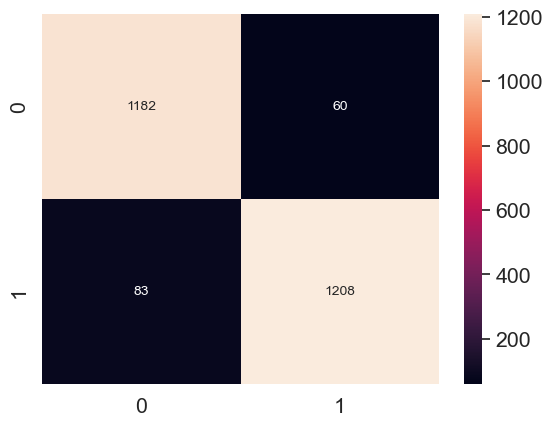

In [10]:
def plot_confussion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(cm, range(cm.shape[0]),
                  range(cm.shape[1]))
    sn.set(font_scale=1.4)
    sn.heatmap(df_cm, annot=True,fmt='.0f',annot_kws={"size": 10})# font size
    plt.show()

plot_confussion_matrix(test_y, predictions.round())

In [11]:
print(classification_report(test_y, predictions.round(), digits=6))

              precision    recall  f1-score   support

           0   0.934387  0.951691  0.942960      1242
           1   0.952681  0.935709  0.944119      1291

    accuracy                       0.943545      2533
   macro avg   0.943534  0.943700  0.943539      2533
weighted avg   0.943711  0.943545  0.943550      2533

